In [1]:
%matplotlib inline


# Averaging multiple FITS file Images and producing a Spectroscopic Graph


This notebook will open all the FITS file in a single folder and averages it. It will also produce a graph of intensity vs pixel number

This example uses `astropy.utils.data` to download the file, `astropy.io.fits` to open
the file, and `matplotlib.pyplot` to display the image.

-------------------

*By: Emir Muhammad and Edward Penny*

*License: BSD*

-------------------





Set up matplotlib, numpy, astropy and os modules


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.optimize import curve_fit


In [8]:

Xenonlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Xenon data/'  
Kryptonlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Krypton data/'  
Argonlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Argon Data/'
Neonlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Neon Data/'
Heliumlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Helium Data/'
Cadmiumlocation = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Cadmium Calibration Data/'

heliumtext = '/Users/Edward/Documents/year 2/lab project/Atomic Data/helium.txt'
neontext = '/Users/Edward/Documents/year 2/lab project/Atomic Data/neon.txt'
argontext = '/Users/Edward/Documents/year 2/lab project/Atomic Data/argon.txt'
kryptontext = '/Users/Edward/Documents/year 2/lab project/Atomic Data/krypton.txt'
xenontext = '/Users/Edward/Documents/year 2/lab project/Atomic Data/xenon.txt'


In [4]:
'''
Xenonlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Xenon Data/' 
Kryptonlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Krypton Data/' 
Argonlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Argon Data/'
Neonlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Neon Data/'
Heliumlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Helium 500/'
Cadmiumlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Xenon Data/'

heliumtext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/helium.txt'
neontext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/neon.txt'
argontext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/argon.txt'
kryptontext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/krypton.txt'
xenontext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/xenon.txt'

'''

"\nXenonlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Xenon Data/' \nKryptonlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Krypton Data/' \nArgonlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Argon Data/'\nNeonlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Neon Data/'\nHeliumlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Helium 500/'\nCadmiumlocation = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Xenon Data/'\n\nheliumtext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/helium.txt'\nneontext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/neon.txt'\nargontext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/argon.txt'\nkryptontext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/krypton.txt'\nxenontext = '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Atomic Data/xenon.txt'\n\n"

Defining a function to calculate the mean data from a particular location

In [9]:
def mean_data(location):
    '''Requires the location as a folder for where all the data is kept, and all the data should be a fit file.
    Returns a 2d array, of the average values from all files'''
    tracks = []
    for i in os.listdir(location):
        if i.endswith(".fit"):
            filename =location + '/' + str(i)
            image_file = get_pkg_data_filename(filename)
            image_data = fits.getdata(image_file, ext=0) #uses astropy module to convert the fit file into an array
            tracks.append(image_data)
    mean = np.mean(tracks, axis = 0)
    return mean


In [10]:
def plot_datapx(data, a=0, b=800):
    '''plots the data, intensity vs pixel'''
    data = data
    snipmean = data[a:b]
    numberofx = snipmean.shape[1]
    x = np.linspace(1, numberofx, numberofx)
    y = np.mean(snipmean, axis = 0)
    plt.title('Plot of superMean Intensity Vs Pixel Number') #you should change this with the title
    plt.xlabel(r'Wavelength (m)')
    plt.ylabel(r'Intensity(arbitrary units)')
    plt.plot(x, y)
    plt.show()
    plt.figure()
    plt.imshow(data, cmap='gray')
    plt.colorbar()

In [18]:
def plot_datawv(data, a=240, b=360, MINspacebetweenpeaks = 10, PROMCUTOFF = 250, Element = None):
    '''plots data, intensity vs wavelength. Wavelength calibration was done in labs'''
    data = data
    snipmean = data[a:b]
    numberofx = snipmean.shape[1]
    xt = np.linspace(1, numberofx, numberofx)
    A = 6.640*10**(-10) #wavelength calibration
    B = 2.736*10**(-7)  #wavelength calibration
    x = A*xt + B        #wavelength calibration
    y = np.mean(snipmean, axis = 0)
    if Element == None:
        plt.title(f'Plot of Mean Intensity Vs Wavelength')
    else:
        plt.title(f'Plot of Mean Intensity Vs Wavelength {Element}')
    plt.xlabel(r'Wavelength (m)')
    plt.ylabel(r'Intensity(arbitrary units)')
    
    peaks,_ = find_peaks(y, distance = MINspacebetweenpeaks)
    proms = peak_prominences(y, peaks)[0]
    proms[proms < PROMCUTOFF] = 0 # making an array of 1's and 0's 
    promsford = list(proms)
    L0 = promsford.count(0)
    DC = 0
    while DC<L0:
        DC +=1
        promsford.remove(0) # finding prominences for the dictionary
    proms[proms > PROMCUTOFF] = 1 # making an array of 1's and 0's 
    keypeaks = proms*peaks # setting all peaks with low prominences to 0
    Lkeypeaks = list(keypeaks) # have to make it into a list to use count and remove
    L1= Lkeypeaks.count(0) # finding the number of 0's for the loop
    RC= 0 
    while RC<L1:
        RC +=1
        Lkeypeaks.remove(0) # remove only removes the first 0 so have to loop it through
    keypeaks = np.array(Lkeypeaks) # convert back to an array for the graphing
    Wavelengthsford= A*keypeaks + B
    Wavelengthsford = list(Wavelengthsford) #getting wavelengths of peaks for the dictionary
    for n in np.nditer(keypeaks):
        plt.axvline(x= A*n+ B,linestyle=':', color = 'r', label='f0')
    plt.plot(x, y)
    Peaksdict = {}
    for i in range(len(promsford)): #assembling the peak dictionary
        Peaksdict[Wavelengthsford[i]] = promsford[i]
    plt.show()
    return None

In [8]:
def peaks_datawv(data, a=210, b=410, MINspacebetweenpeaks = 10, PROMCUTOFF = 250):
    '''returns a dictionary of distinct peaks in a specified range'''
    data = data
    snipmean = data[a:b]
    numberofx = snipmean.shape[1]
    xt = np.linspace(1, numberofx, numberofx)
    A = 6.640*10**(-10) #calibration from pixels to wavelengths
    B = 2.736*10**(-7)
    x = A*xt + B
    y = np.mean(snipmean, axis = 0)
    peaks,_ = find_peaks(y, distance = MINspacebetweenpeaks)
    proms = peak_prominences(y, peaks)[0]
    proms[proms < PROMCUTOFF] = 0 # making an array of 1's and 0's 
    promsford = list(proms)
    L0 = promsford.count(0)
    DC = 0
    while DC<L0:
        DC +=1
        promsford.remove(0) # finding prominences for the dictionary
    proms[proms > PROMCUTOFF] = 1 # making an array of 1's and 0's 
    keypeaks = proms*peaks # setting all peaks with low prominences to 0
    Lkeypeaks = list(keypeaks) # have to make it into a list to use count and remove
    L1= Lkeypeaks.count(0) # finding the number of 0's for the loop
    RC= 0 
    while RC<L1:
        RC +=1
        Lkeypeaks.remove(0) # remove only removes the first 0 so have to loop it through
    keypeaks = np.array(Lkeypeaks) # convert back to an array for the graphing
    Wavelengthsford= A*keypeaks + B
    Wavelengthsford = list(Wavelengthsford) #getting wavelengths of peaks for the dictionary
    Peaksdict = {}
    for i in range(len(promsford)): #assembling the peak dictionary
        Peaksdict[Wavelengthsford[i]] = promsford[i]
    return Peaksdict

In [12]:
def extrainfo(data, a=240, b=360, MINspacebetweenpeaks = 10, PROMCUTOFF = 250):
    data = data
    snipmean = data[a:b]
    numberofx = snipmean.shape[1]
    xt = np.linspace(1, numberofx, numberofx)
    A = 6.640*10**(-10)
    B = 2.736*10**(-7)
    x = A*xt + B
    y = np.mean(snipmean, axis = 0)
    peaks,_ = find_peaks(y, distance = MINspacebetweenpeaks)
    proms = peak_prominences(y, peaks)[0]
    proms[proms < PROMCUTOFF] = 0 # making an array of 1's and 0's 
    promsford = list(proms)
    L0 = promsford.count(0)
    DC = 0
    while DC<L0:
        DC +=1
        promsford.remove(0) # finding prominences for the dictionary
    proms[proms > PROMCUTOFF] = 1 # making an array of 1's and 0's 
    keypeaks = proms*peaks # setting all peaks with low prominences to 0
    Lkeypeaks = list(keypeaks) # have to make it into a list to use count and remove
    L1= Lkeypeaks.count(0) # finding the number of 0's for the loop
    RC= 0 
    while RC<L1:
        RC +=1
        Lkeypeaks.remove(0) # remove only removes the first 0 so have to loop it through
    keypeaks = np.array(Lkeypeaks) # convert back to an array for the graphing
    Wavelengthsford= A*keypeaks + B
    Wavelengthsford = list(Wavelengthsford) #getting wavelengths of peaks for the dictionary
    Peaksdict = {}
    for i in range(len(promsford)): #assembling the peak dictionary
        Peaksdict[Wavelengthsford[i]] = promsford[i]

        
    '''finding rel intensities'''
    keypeaks =keypeaks.astype(int)
    peaksy = []
    for n in keypeaks:
        peaksy.append(y[n])
    TT=np.max(peaksy)
    relint=(peaksy) #replace 1 with 1000/TT
    Relintdict = {}
    for i in range(len(peaksy)):
        Relintdict[Wavelengthsford[i]] = relint[i]
    widths = peak_widths(y, keypeaks)
    Wavelengthsford=np.array(Wavelengthsford)
    widths=widths[0]
    GD=[]
    for a,b,c in zip(Wavelengthsford,relint,widths):
        temp=(a, c*A, b)
        GD.append(temp)
    return(GD)

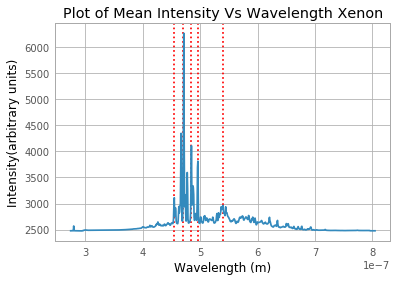

In [19]:
plot_datawv(mean_data(Xenonlocation), Element = 'Xenon')

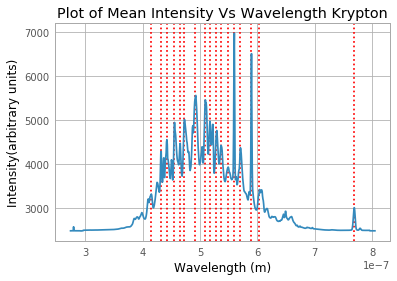

In [20]:
plot_datawv(mean_data(Kryptonlocation), Element = 'Krypton')

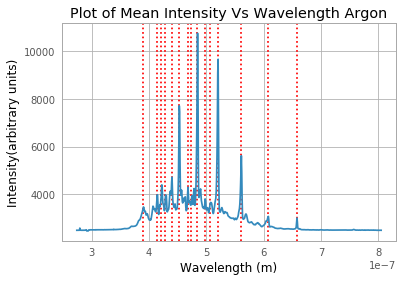

In [21]:
plot_datawv(mean_data(Argonlocation), Element = 'Argon')

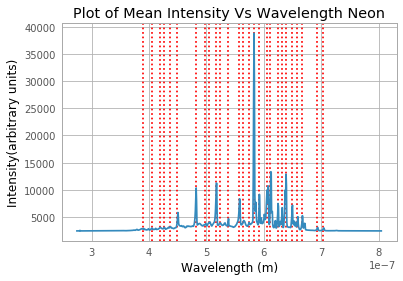

In [22]:
plot_datawv(mean_data(Neonlocation), Element = 'Neon')

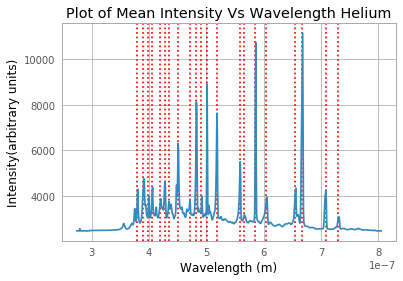

In [23]:
plot_datawv(mean_data(Heliumlocation), Element = 'Helium')

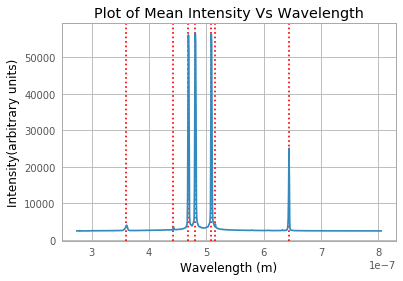

In [11]:
plot_datawv(mean_data(Cadmiumlocation))

In [16]:
f=open(heliumtext,"r")
lines=f.readlines()

result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
Heliumdict = {}
results = [float(i)*10**(-10) for i in result]
for i in range(len(result)): #assembling the peak dictionary
    Heliumdict[results[i]] = a[i]
#print(len(Heliumdict))
#print(results)

f=open(argontext,"r")
lines=f.readlines()

result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
Argondict = {}
results = [float(i)*10**(-10) for i in result]
for i in range(len(result)): #assembling the peak dictionary
    Argondict[results[i]] = a[i]
#print(len(Argondict))



f=open(neontext,"r")
lines=f.readlines()
result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
results = [float(i)*10**(-10) for i in result]
Neondict = {}
for i in range(len(result)): #assembling the peak dictionary
    Neondict[results[i]] = a[i]
#print(Neondict)




f=open(kryptontext,"r")
lines=f.readlines()

result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
results = [float(i)*10**(-10) for i in result]
Kryptondict = {}
for i in range(len(result)): #assembling the peak dictionary
    Kryptondict[results[i]] = a[i]
#print(len(Kryptondict))



f=open(xenontext,"r")
lines=f.readlines()

result=[]
results2 = []
for x in lines:
    result.append(x.split(' ')[0])
    results2.append(x.split(' ')[-1])
f.close()
a = [float(i) for i in results2]
results = [float(i)*10**(-10) for i in result]
Xenondict = {}
for i in range(len(result)): #assembling the peak dictionary
    Xenondict[results[i]] = a[i]
#print(Xenondict)

In [17]:
True_element_rel_in_d = {'He': Heliumdict, 'Ne' : Neondict, 'Ar' : Argondict, 'Kr':  Kryptondict, 'Xe' : Xenondict}

a=True_element_rel_in_d.get('He').keys()

datad= {}
for keys in True_element_rel_in_d.keys():
    datad.update({f'{keys}': list(True_element_rel_in_d.get(f'{keys}').keys())})

In [18]:
testunknown= peaks_datawv(mean_data(Xenonlocation))
print(testunknown)
unknown = list(testunknown.keys())
print(unknown)
founddict = {}
for element in datad.keys():
    thelist = []
    for x in unknown:
        for y in datad.get(element):
            if abs(x - y) < 6.640*10**(-10):
                thelist.append(y)
    founddict.update({f'{element}' : thelist})
print('')
print(founddict)

{4.5420800000000004e-07: 433.1791900000003, 4.70808e-07: 2920.317949999999, 4.77448e-07: 712.655670000001, 4.84088e-07: 1081.3372099999988, 4.95376e-07: 959.5183899999997, 5.392000000000001e-07: 263.48741999999993}
[4.5420800000000004e-07, 4.70808e-07, 4.77448e-07, 4.84088e-07, 4.95376e-07, 5.392000000000001e-07]

{'He': [4.71315e-07, 4.7133800000000003e-07], 'Ne': [4.53775e-07, 4.54038e-07, 4.7043999999999997e-07, 4.70886e-07, 4.71007e-07, 4.7120699999999997e-07], 'Ar': [4.5450500000000003e-07, 4.70232e-07], 'Kr': [4.84661e-07], 'Xe': [4.84329e-07, 5.3928e-07]}


In [19]:
def matchelements(location): 
    testunknown= peaks_datawv(mean_data(location))
    unknown = list(testunknown.keys())
    founddict = {}
    for element in datad.keys():
        thelist = []
        for x in unknown:
            for y in datad.get(element):
                if abs(x - y) < 6.640*10**(-10):
                    thelist.append(round(y, 11))
        founddict.update({f'{element}' : thelist})
    return founddict

In [20]:
print(matchelements(Xenonlocation))
print('')
print(matchelements(Kryptonlocation))
print('')
print(matchelements(Argonlocation))
print('')
print(matchelements(Neonlocation))
print('')
print(matchelements(Heliumlocation))

{'He': [4.7131e-07, 4.7134e-07], 'Ne': [4.5377e-07, 4.5404e-07, 4.7044e-07, 4.7089e-07, 4.7101e-07, 4.7121e-07], 'Ar': [4.5451e-07, 4.7023e-07], 'Kr': [4.8466e-07], 'Xe': [4.8433e-07, 5.3928e-07]}

{'He': [4.1438e-07, 4.9219e-07], 'Ne': [4.4214e-07, 4.4285e-07, 4.4286e-07, 4.7154e-07, 6.0743e-07], 'Ar': [4.1561e-07, 4.426e-07, 4.5451e-07, 4.7216e-07, 4.7269e-07, 5.0905e-07, 5.1623e-07, 5.1658e-07, 5.8886e-07], 'Kr': [4.1451e-07, 4.3178e-07, 4.3186e-07, 4.3196e-07, 4.4252e-07, 5.0865e-07], 'Xe': [4.3105e-07, 4.4161e-07, 4.9165e-07, 4.9232e-07, 5.0806e-07, 5.2922e-07, 5.3632e-07, 5.3681e-07, 5.6996e-07, 5.8933e-07, 5.895e-07]}

{'He': [4.1438e-07], 'Ne': [4.2197e-07, 4.392e-07, 4.398e-07, 4.5227e-07, 6.0743e-07], 'Ar': [4.2187e-07, 4.2226e-07, 4.227e-07, 4.2282e-07, 4.4001e-07, 4.401e-07, 4.5223e-07, 4.5306e-07, 5.6067e-07], 'Kr': [3.9062e-07, 4.1451e-07, 4.2929e-07, 4.4e-07, 4.5231e-07, 4.6804e-07, 4.8466e-07, 6.5701e-07], 'Xe': [3.9079e-07, 4.223e-07, 4.2964e-07, 4.3932e-07, 4.3958e-07

# Gaussian Conversion

[(3.898e-07, 6.1733027174732075e-09, 2914.3447166666674), (4.04408e-07, 2.0392301992898806e-09, 2989.250716666668), (4.19016e-07, 3.528980905938206e-09, 3111.0706833333334), (4.25656e-07, 2.123063130964362e-09, 3107.6038999999996), (4.36944e-07, 3.0127181285351037e-09, 3226.202083333335), (4.4956e-07, 1.9738813324946954e-09, 5848.671049999998), (4.81432e-07, 2.0201393410142053e-09, 10354.236833333336), (4.98032e-07, 2.1567373824145837e-09, 3815.812466666667), (5.05336e-07, 4.771019711718974e-09, 4124.219483333332), (5.166240000000001e-07, 2.2696135695813655e-09, 11257.215433333333), (5.23264e-07, 3.575031629659659e-09, 3933.6147333333333), (5.37872e-07, 1.1736565019681398e-09, 4713.994049999998), (5.571280000000001e-07, 2.383760588136897e-09, 8376.984783333332), (5.64432e-07, 3.6196875623070917e-09, 4373.220416666667), (5.73728e-07, 1.0454755497262245e-09, 4028.109033333333), (5.8236e-07, 1.946813149254633e-09, 38790.33038333334), (5.91656e-07, 1.505820382930341e-09, 9176.19271666667),

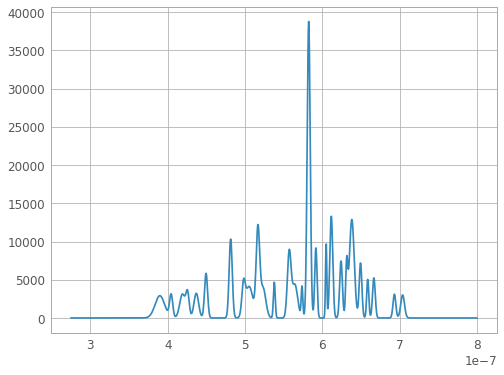

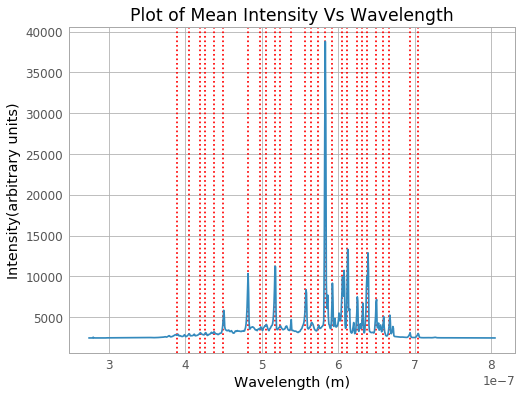

In [21]:
def gaussian(x, mu, sig, a):
    return a*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def fullgaussian(x, y):
    b = 0
    for mu, sig, a in y:
        b += gaussian(x, mu, sig, a)
    return b
        
x_values = np.linspace(2.75*10**(-7), 8*10**(-7), 1200)
gaussian1 = fullgaussian
gaussian2 = fullgaussian
y2 = extrainfo(mean_data(Neonlocation))
print(y2)

plt.plot(x_values, gaussian1(x_values, y2))
plt.show()

plot_datawv(mean_data(Neonlocation))

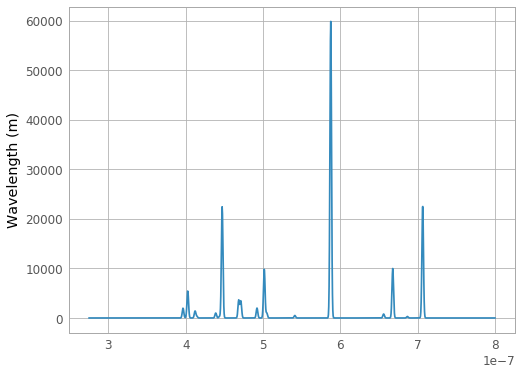

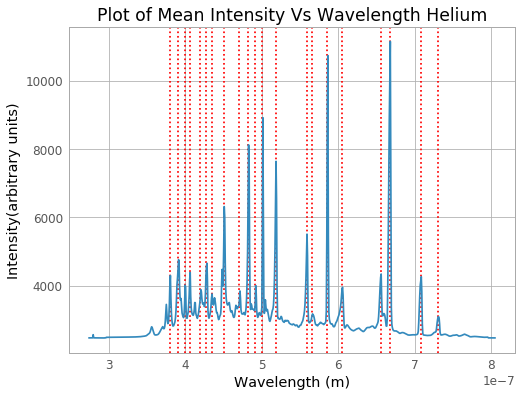

In [22]:

gaussian3 = fullgaussian
#y value is mu sig a
yHe = []
useddict = Heliumdict
for x in useddict:
    temp = (x, 1e-09, useddict[x]*100)
    yHe.append(temp)
plt.plot(x_values, gaussian3(x_values, yHe))
plt.ylabel(r'Wavelength (m)')
plt.show()

#plt.plot(x_values, gaussian1(x_values, y2))

plot_datawv(mean_data(Heliumlocation), Element = 'Helium')



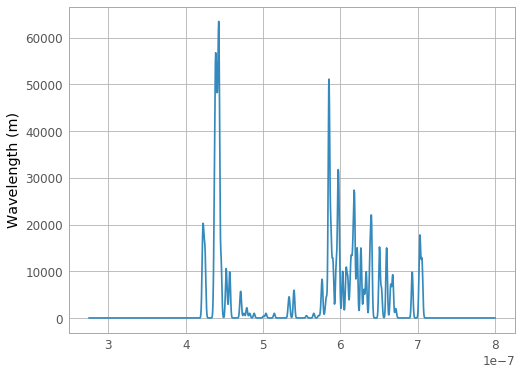

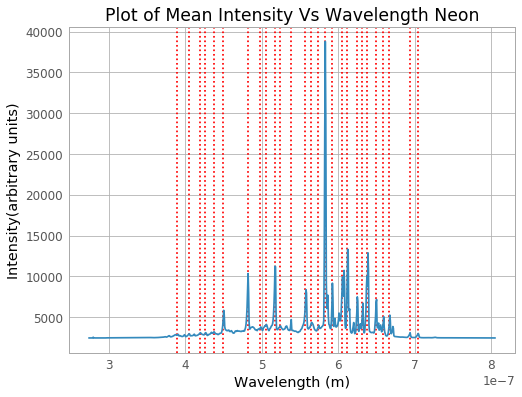

In [23]:
gaussian3 = fullgaussian
yHe = []
useddict = Neondict
for x in useddict:
    temp = (x, 1e-09, useddict[x]*100)
    yHe.append(temp)
plt.plot(x_values, gaussian3(x_values, yHe))
plt.ylabel(r'Wavelength (m)')
plt.show()


plot_datawv(mean_data(Neonlocation), Element = 'Neon')




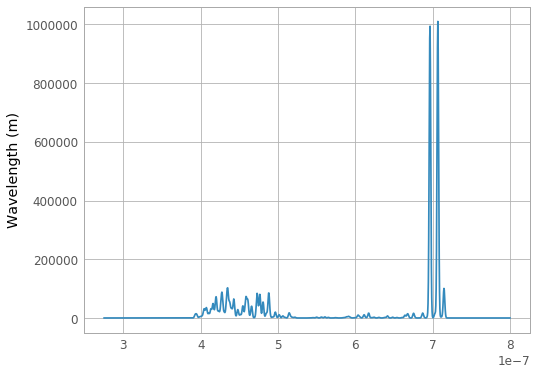

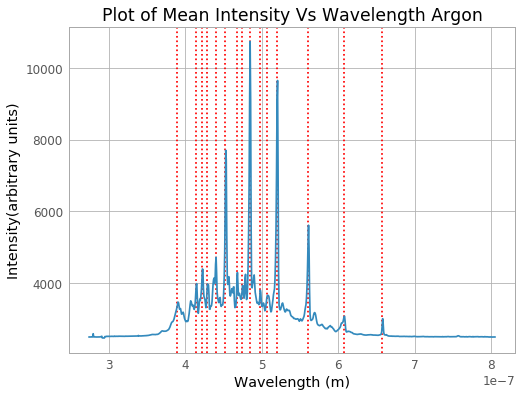

In [24]:
#print(Heliumdict.keys())
gaussian3 = fullgaussian
#y value is mu sig a
yHe = []
useddict = Argondict
for x in useddict:
    temp = (x, 1e-09, useddict[x]*100)
    yHe.append(temp)
plt.plot(x_values, gaussian3(x_values, yHe))
plt.ylabel(r'Wavelength (m)')
plt.show()

#plt.plot(x_values, gaussian1(x_values, y2))

plot_datawv(mean_data(Argonlocation), Element = 'Argon')




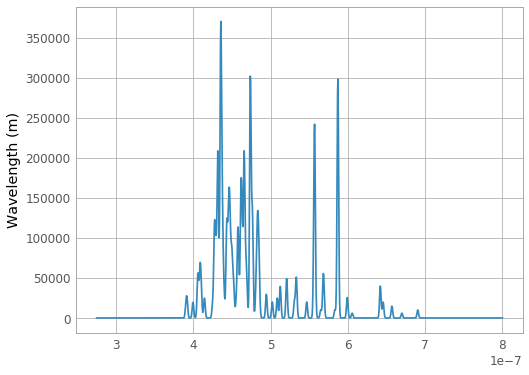

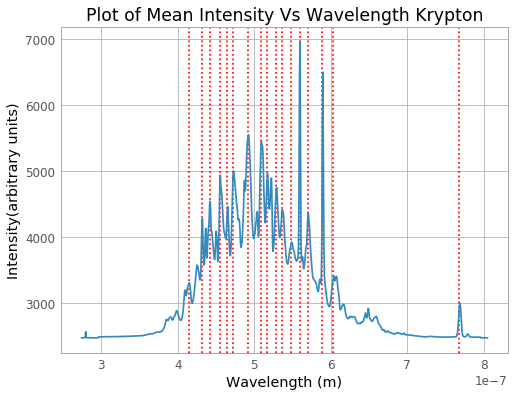

In [25]:
#print(Heliumdict.keys())
gaussian3 = fullgaussian
#y value is mu sig a
yHe = []
useddict = Kryptondict
for x in useddict:
    temp = (x, 1e-09, useddict[x]*100)
    yHe.append(temp)
plt.plot(x_values, gaussian3(x_values, yHe))
plt.ylabel(r'Wavelength (m)')
plt.show()

#plt.plot(x_values, gaussian1(x_values, y2))

plot_datawv(mean_data(Kryptonlocation), Element = 'Krypton')




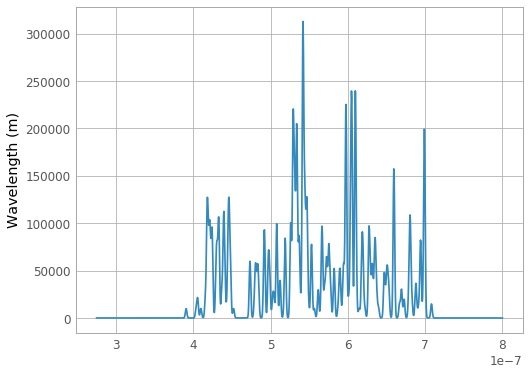

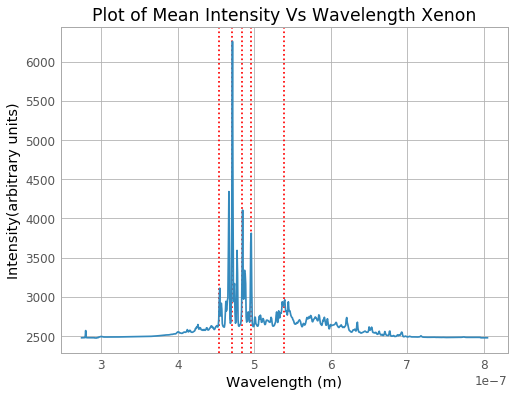

In [26]:
#print(Heliumdict.keys())
gaussian3 = fullgaussian
#y value is mu sig a
yHe = []
useddict = Xenondict
for x in useddict:
    temp = (x, 1e-09, useddict[x]*100)
    yHe.append(temp)
plt.plot(x_values, gaussian3(x_values, yHe))
plt.ylabel(r'Wavelength (m)')
plt.show()

#plt.plot(x_values, gaussian1(x_values, y2))

plot_datawv(mean_data(Xenonlocation), Element = 'Xenon')




# Anything below this is scrap

In [27]:
testdata = mean_data('/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Helium Data')
testspectrum = np.mean(testdata, axis = 0)

data = testdata
snipmean = data
numberofx = snipmean.shape[1]
x = np.linspace(1, numberofx, numberofx)
y = np.mean(snipmean, axis = 0)
plt.title('Plot of superMean Intensity Vs Pixel Number')
plt.xlabel(r'Pixel Number of CCDSPEC (px)')
plt.ylabel(r'Intensity(arbitrary units)')
peaks = find_peaks(testspectrum, height=3200)
a = np.arange(6)
print(a)
print(peaks[0])
for n in np.nditer(peaks[0]):
    plt.axvline(x=n,linestyle='--', color = '#808080', label='f0')
plt.plot(x, y)
plt.show()
plt.figure()
plt.imshow(data, cmap='gray')
plt.colorbar()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/emirmuhammad/Desktop/Ed-Em-Y2Spec/Helium Data'

In [ ]:
optimisation
curve fitting
calculate chi squared for each point
minise chi